## Principle Component Analysis (PCA) : IRIS DATASET

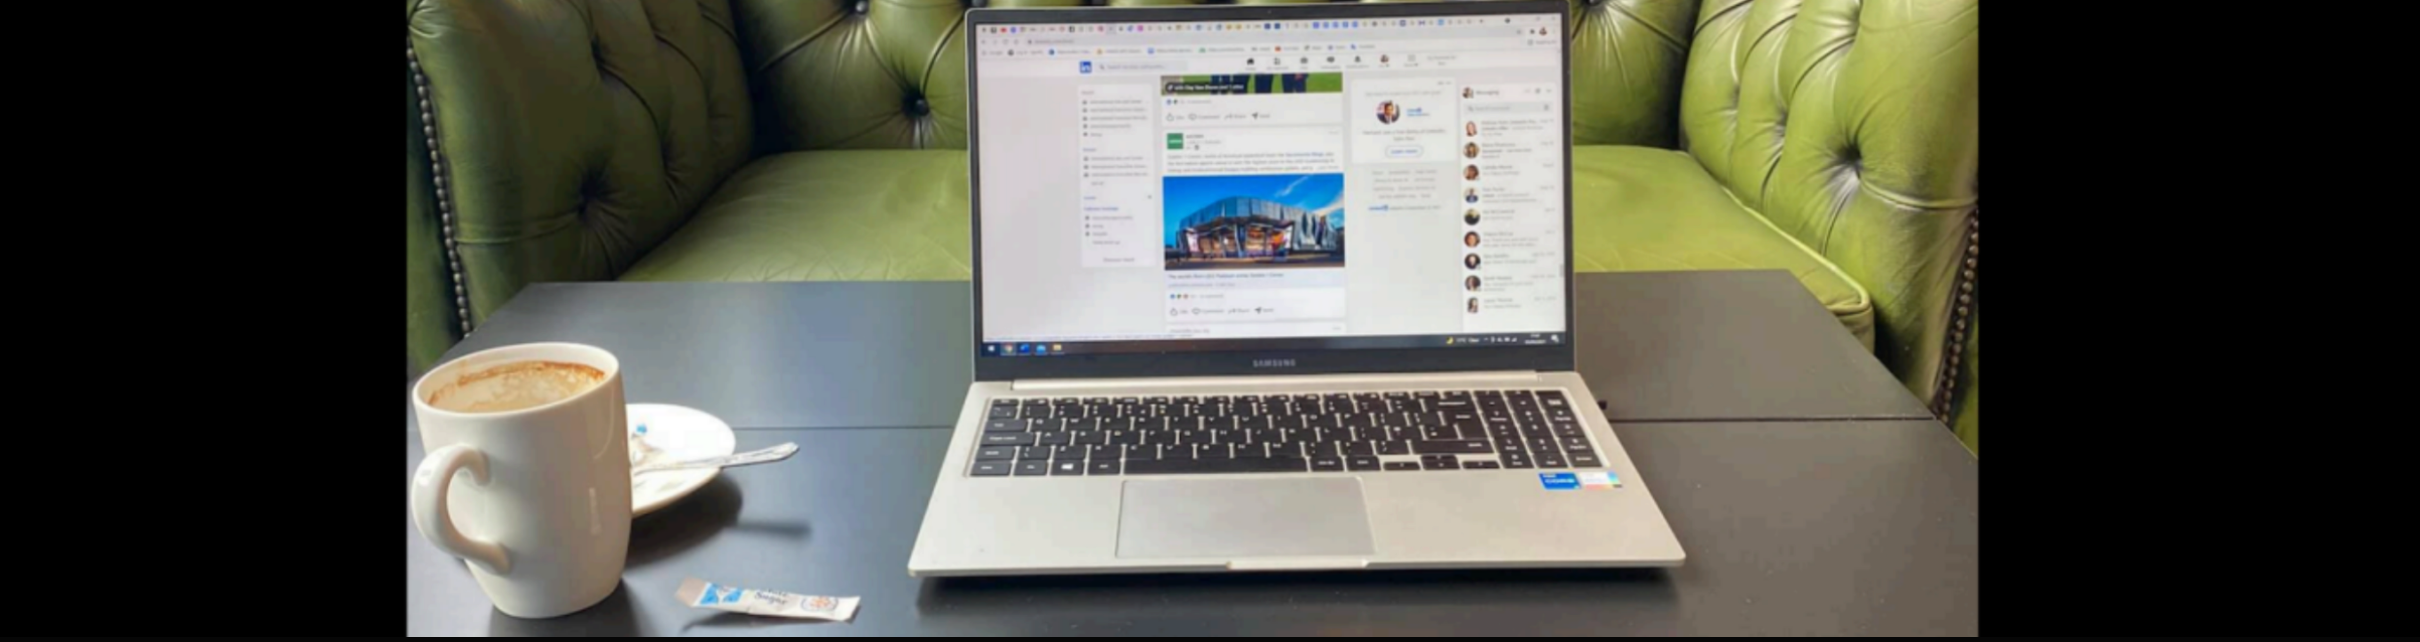

#### Hemant Thapa

## Table of Contents

1. **Introduction**

2. **Practical Implementation**
   - Loading Libraries
   - Data Loading: Iris Dataset
   - Initial Data Exploration
     - Data Shape and Size
     - Data Types and Descriptions
     - Pairplot Visualization
     - Correlation Analysis
     - Histograms for Each Feature
   - Standardization of Data

3. **Deep Learning Model Implementation**
   - Model Building and Training
   - Loss and Accuracy Analysis

4. **Decision Boundary Analysis**
   - Visualization for Different Feature Combinations

5. **PCA Implementation**
   - PCA Transformation
   - Explained Variance Analysis
   - Data Splitting (Training and Testing)
   - Deep Learning Model with PCA Features
   - Decision Boundary Visualisation

#### Introduction 

Principal Component Analysis (PCA) is a statistical technique to simplify complex data sets. It's a method of dimensionality reduction, which means it reduces the number of variables in the data while trying to preserve as much of the variability or information as possible.

###### What PCA Does:
Identifying Principal Components: PCA identifies the directions (called principal components) in which the data varies the most. Each principal component is a linear combination of the original variables.

Dimensionality Reduction: By identifying these principal components, PCA reduces the dimensionality of the data. The first principal component accounts for the most variance, the second (orthogonal to the first) accounts for the second most, and so on.

Data Transformation: PCA transforms the original variables into a new set of variables, the principal components, which are uncorrelated.

###### Why PCA is Useful:
Noise Reduction: By focusing on the directions with the most variance, PCA can help filter out noise and reduce the complexity of the data.

Data Visualization: When data has many dimensions, it's challenging to visualize. PCA can reduce the dimensions to 2 or 3 principal components, making visualization possible.

Feature Extraction: PCA can be used to uncover hidden patterns in the data by extracting important features.

Efficiency in Machine Learning: In machine learning, having fewer input variables can make algorithms faster and more efficient. PCA can reduce the number of input features while retaining the most important information.

Dealing with Multicollinearity: In datasets where variables are highly correlated, PCA can create uncorrelated principal components, which can be advantageous in certain statistical models.

Data Compression: By reducing the number of dimensions, PCA effectively compresses the data, which can be important for storage and processing efficiency.

#### Loading libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

#### Loading Dataset 

In [3]:
#loading dataset
iris_data = datasets.load_iris()

In [4]:
#creating dataframe
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

In [5]:
df['target'] = iris_data.target

In [6]:
df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['target'].unique()

array([0, 1, 2])

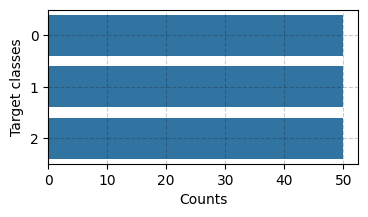

In [8]:
#count of target 
#Iris-setosa : 0,Iris-versicolor:1, Iris-virginica:2
plt.figure(figsize=(4, 2))
sns.countplot(y=df.target ,data=df)
plt.xlabel("Counts")
plt.ylabel("Target classes")
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.show()

In [9]:
df.shape

(150, 5)

In [10]:
df.size

750

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

#### Exploratory Data Analysis

In [13]:
#statical analysis
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Figure size 1000x800 with 0 Axes>

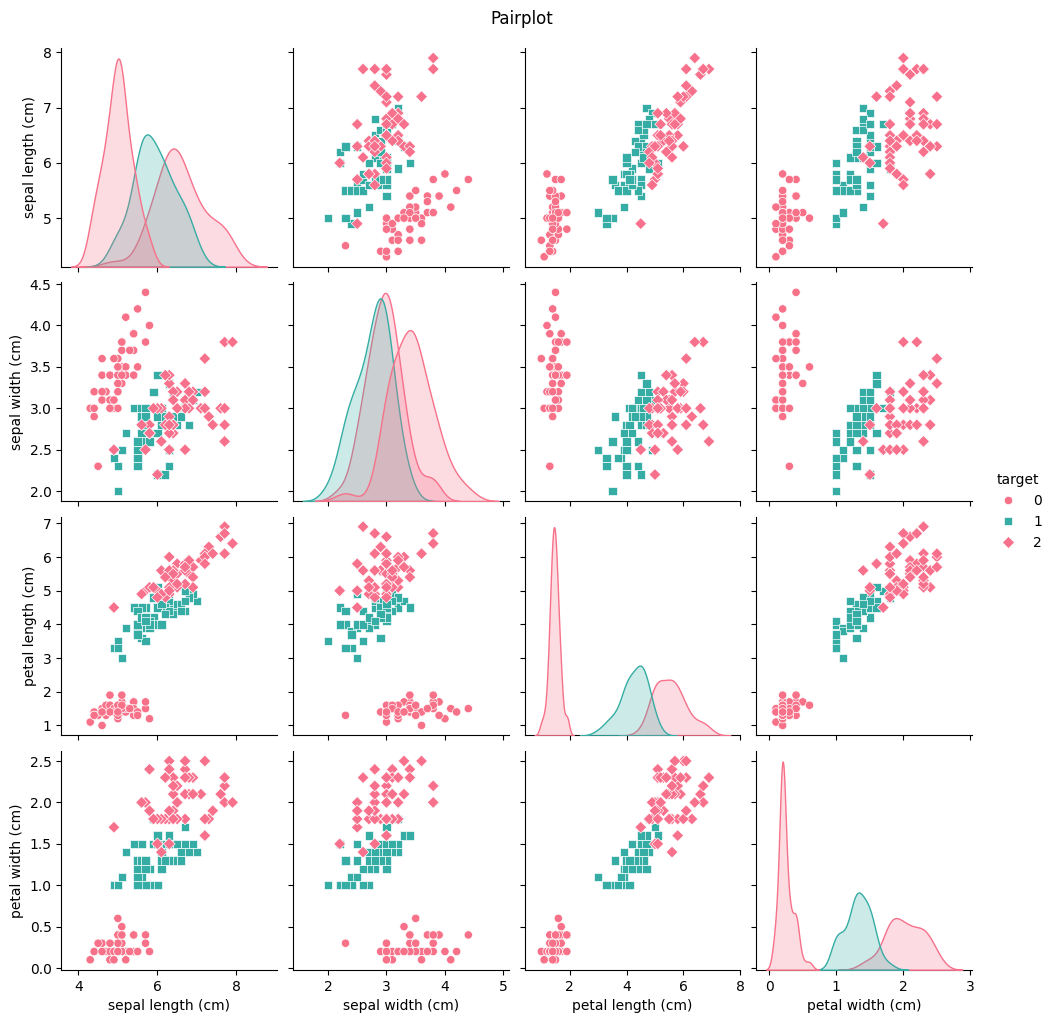

In [14]:
#pairplot 
plt.figure(figsize=(10, 8))
pairplot = sns.pairplot(df, hue='target', markers=["o", "s", "D"], palette="husl")
pairplot.fig.suptitle("Pairplot", y=1.02)
plt.show()

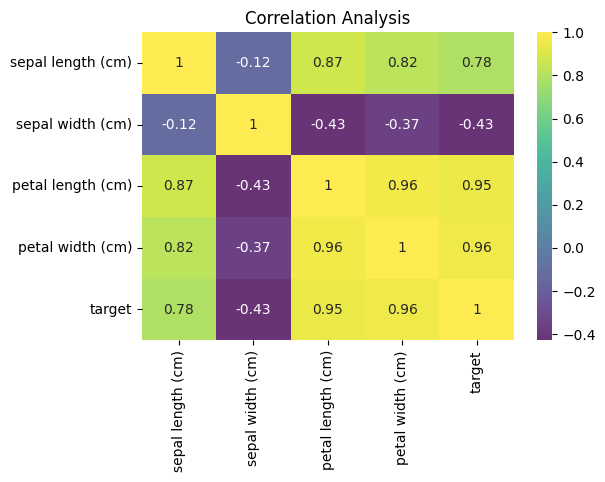

In [15]:
#correlation analysis
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True,cmap='viridis', alpha=0.8) 
plt.title("Correlation Analysis")
plt.show()

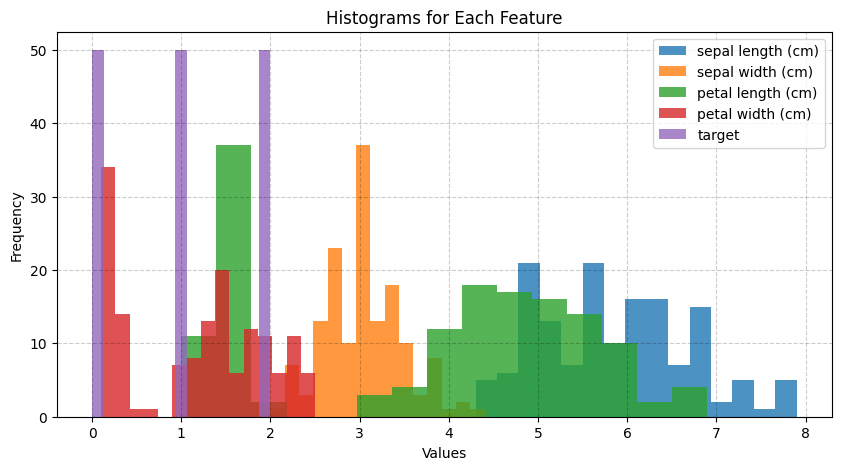

In [16]:
#histoplot
plt.figure(figsize=(10,5))
for column in df.columns:
    plt.hist(df[column], bins=15, alpha=0.8, label=column)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histograms for Each Feature")
plt.legend()
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.show()

#### Feature Engineering 

In [17]:
#features
X = iris_data.data 
#target values
y = iris_data.target 

In [18]:
#standardise scale
X = (X - X.mean())/X.std()

In [19]:
X[:5]

array([[ 0.82858665,  0.01798522, -1.04592915, -1.65388022],
       [ 0.72726147, -0.23532773, -1.04592915, -1.65388022],
       [ 0.62593629, -0.13400255, -1.09659174, -1.65388022],
       [ 0.5752737 , -0.18466514, -0.99526657, -1.65388022],
       [ 0.77792406,  0.06864781, -1.04592915, -1.65388022]])

In [20]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
X_train[:5], X_test[:5]

(array([[ 0.77792406, -0.74195362,  0.01798522, -1.24857951],
        [ 1.5378629 , -0.23532773,  1.031237  , -0.8432788 ],
        [ 1.63918807, -0.08333996,  1.13256218, -0.48864067],
        [ 1.28454995, -0.64062844,  0.77792406, -0.99526657],
        [ 1.63918807, -0.48864067,  1.18322477, -0.8432788 ]]),
 array([[ 1.18322477, -0.33665291,  0.82858665, -0.53930326],
        [ 1.28454995, -0.64062844,  0.27129817, -1.24857951],
        [ 1.031237  ,  0.37262334, -1.04592915, -1.65388022],
        [ 1.94316361, -0.28599032,  1.43653772, -0.8432788 ],
        [ 0.77792406, -0.03267737, -0.99526657, -1.65388022]]))

#### Building Model 

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
#building deep learning model
def deep_learning_model(X_train, y_train, X_test, y_test, features_input):
        model = keras.Sequential([
        #input layer for 4 features
        keras.layers.Dense(64, activation='relu', input_shape=(features_input,)),
        keras.layers.Dense(32, activation='relu'),
        #output layer with 3 units for 3 classes
        keras.layers.Dense(3, activation='softmax')  
        ])
        
        model.compile(optimizer='adam',
                       #for multiclass classification
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
        #epoches 200 and batch size 32 
        history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=0)
        loss = history.history['loss']
        accuracy = history.history['accuracy']
        val_loss = history.history['val_loss']
        val_accuracy = history.history['val_accuracy']
        #return values
        return model, history, loss, accuracy, val_loss, val_accuracy

In [26]:
model, history, loss, accuracy, val_loss, val_accuracy = deep_learning_model(X_train, y_train, X_test, y_test, 4)

#### Evaluating Loss and Accuracy 

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

2/2 [==============================] - 0s 4ms/step - loss: 0.0921 - accuracy: 0.9778
Test accuracy: 97.78%


In [28]:
def loss_and_accuracy_plot():
    plt.figure(figsize=(12, 4))
    #training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, ls='--', alpha=0.2, color='black')
    plt.legend()
    plt.title('Loss vs. Epoch')
    
    #plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy vs. Epoch')
    plt.grid(True, ls='--', alpha=0.2, color='black')
    plt.tight_layout()
    plt.show()

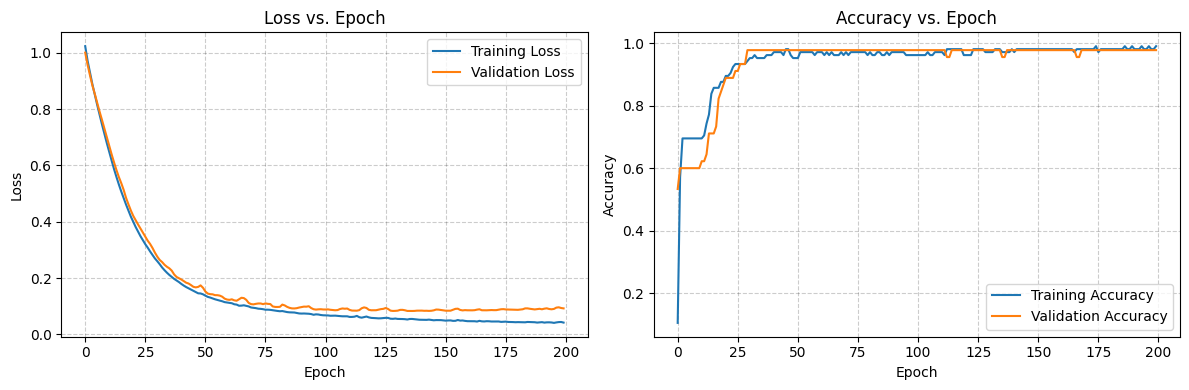

In [29]:
loss_and_accuracy_plot()

#### Decision Boundary 

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
def decision_boundary(X, y, features):
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X[:, features])
    #mesh grid for plotting
    n_points = 100
    x1_min, x1_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
    x2_min, x2_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    xx = np.column_stack((xx1.ravel(), xx2.ravel()))

    #neural network model specific to this feature pair
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(2,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    #train the model on the standardised feature pair
    history = model.fit(X_std, y, epochs=1000, batch_size=32, verbose=0)
    #mesh grid data using the same scaler
    xx_std = scaler.transform(xx)
    #predictions 
    predictions = model.predict(xx_std)
    #reshape the predictions to match the contour plot dimensions
    predictions = predictions.argmax(axis=1).reshape(xx1.shape)
    #contour plot
    plt.figure(figsize=(6, 4))
    plt.contourf(xx1, xx2, predictions, cmap=plt.cm.RdYlBu, alpha=0.5)
    #scatter plot of standardised features using inverse transform to plot in original scale
    plt.scatter(scaler.inverse_transform(X_std)[:, 0], scaler.inverse_transform(X_std)[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.xlabel(f'Feature {features[0]+1}')
    plt.ylabel(f'Feature {features[1]+1}')
    plt.title(f'Decision Boundary Plot for Features {features[0]+1} and {features[1]+1}')
    plt.grid(True, ls='--', alpha=0.2, color='black')
    plt.show()

313/313 [==============================] - 0s 1ms/step


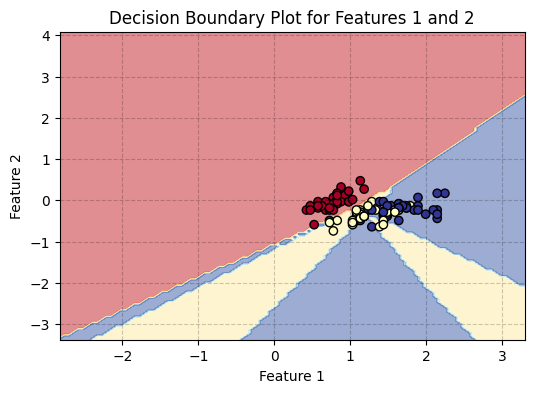

In [32]:
decision_boundary(X_train, y_train, [0, 1])

313/313 [==============================] - 0s 959us/step


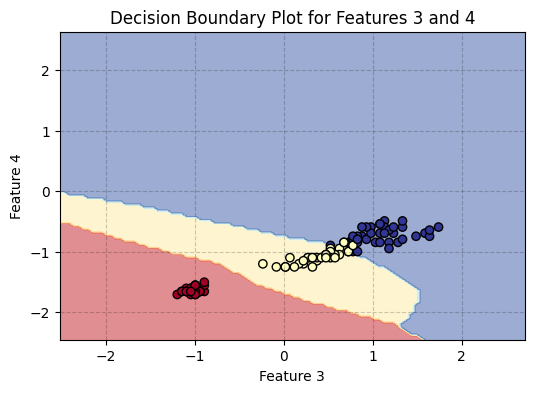

In [33]:
decision_boundary(X_train, y_train, [2, 3])

#### PCA Transformation

In [34]:
from sklearn.decomposition import PCA

In [35]:
#features
X = iris_data.data 
#target values
y = iris_data.target 

In [36]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [37]:
pca = PCA()

In [38]:
X_new = pca.fit_transform(X)

In [39]:
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

#### Explained Variance Analysis

In [40]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

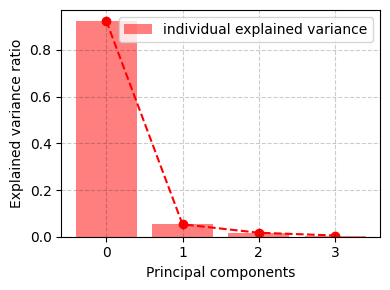

In [41]:
plt.figure(figsize=(4, 3))
plt.bar(range(4), explained_variance, color='red', alpha=0.5, align='center',label='individual explained variance')
plt.scatter(range(4), explained_variance, color='red')
plt.plot(range(4), explained_variance, color='red', ls='--')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.tight_layout()

In [42]:
#tranformation 
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [43]:
#splitting new data into train and test
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=0)

In [44]:
X_train_new[:5], X_test_new[:5]

(array([[ 1.90509815,  0.04930053,  0.16218024],
        [ 0.58800644, -0.48428742,  0.4444335 ],
        [-2.56231991,  0.36771886, -0.07849421],
        [ 1.29113206, -0.11666865,  0.23125646],
        [ 2.15943764, -0.21727758,  0.20876317]]),
 array([[ 1.58592822, -0.53964071,  0.62902933],
        [ 0.26497651, -0.55003646, -0.69414683],
        [-2.59873675,  1.09314576,  0.15781081],
        [ 2.93258707,  0.3555    , -0.42023994],
        [-2.62614497,  0.16338496, -0.02187932]]))

In [45]:
#checking shape of features
X_train_new.shape, X_test_new.shape

((120, 3), (30, 3))

In [46]:
#checking shape of target 
y_train.shape, y_test.shape

((120,), (30,))

In [47]:
model, history, loss, accuracy, val_loss, val_accuracy = deep_learning_model(X_train_new,y_train, X_test_new,y_test, 3)

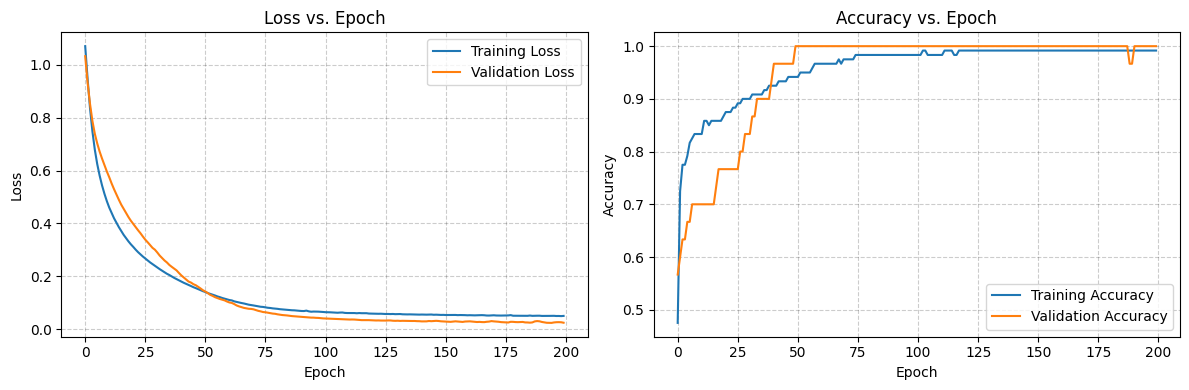

In [48]:
#loss and accuracy plot
loss_and_accuracy_plot()

In [49]:
#test accuracy 
test_loss, test_accuracy = model.evaluate(X_test_new, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 21ms/step - loss: 0.0239 - accuracy: 1.0000
Test accuracy: 100.00%


313/313 [==============================] - 0s 861us/step


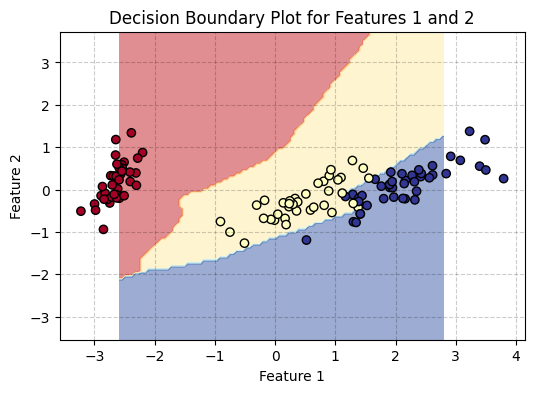

In [50]:
#decision boundary plot for feature 1 and 2
decision_boundary(X_train_new, y_train, [0, 1])

313/313 [==============================] - 0s 959us/step


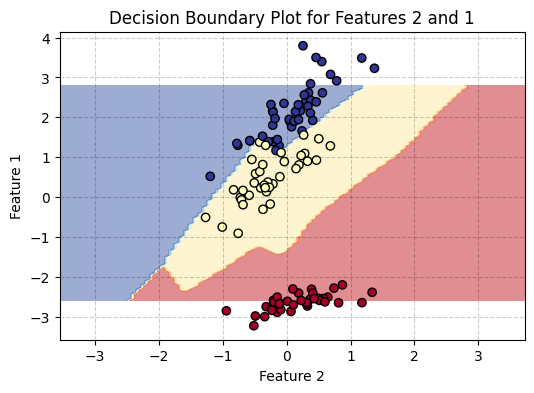

In [51]:
#decision boundary plot for feature 1 and 2
decision_boundary(X_train_new, y_train, [1, 0])

313/313 [==============================] - 0s 982us/step


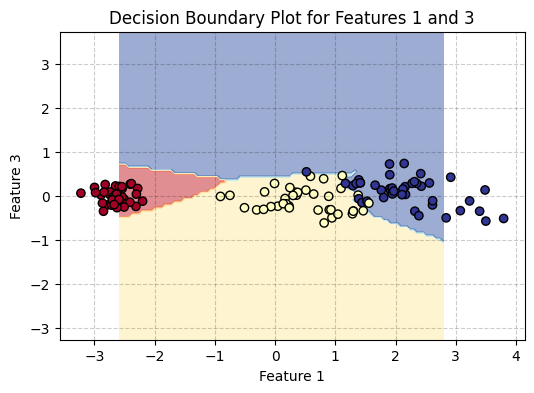

In [52]:
#decision boundary plot for feature 1 and 3
decision_boundary(X_train_new, y_train, [0, 2])

313/313 [==============================] - 0s 978us/step


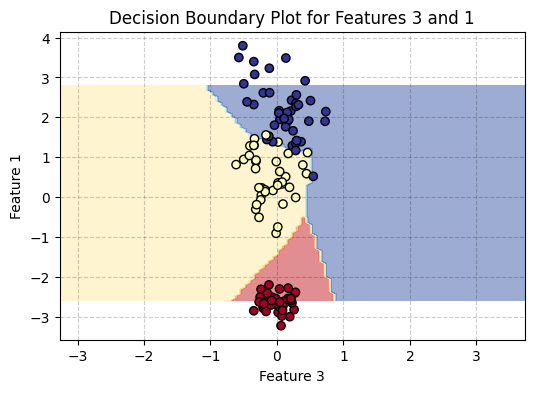

In [53]:
#decision boundary plot for feature 1 and 3
decision_boundary(X_train_new, y_train, [2, 0])

313/313 [==============================] - 0s 907us/step


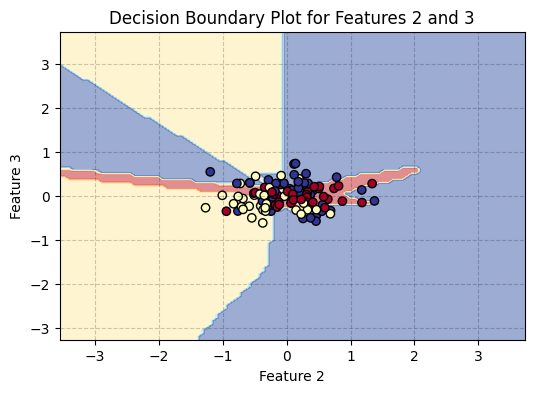

In [54]:
#decision boundary plot for feature 2 and 3
decision_boundary(X_train_new, y_train, [1, 2])

313/313 [==============================] - 0s 914us/step


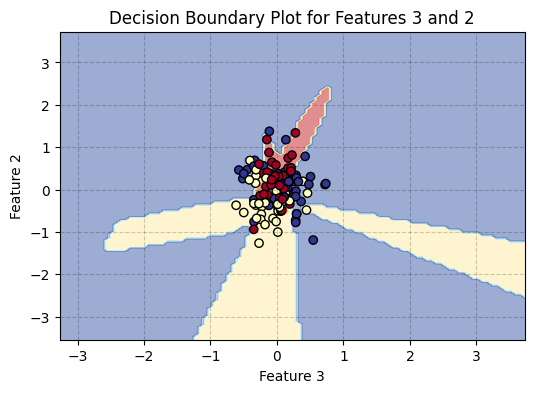

In [55]:
#decision boundary plot for feature 2 and 3
decision_boundary(X_train_new, y_train, [2, 1])